In [ ]:
#@title librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier



In [ ]:
url = 'https://raw.githubusercontent.com/nodd3r/recursos/refs/heads/main/datasets/cancer/breast-cancer-wisconsin.data.txt'
datos = pd.read_table(url, sep=",")

In [ ]:
datos.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
datos.shape

(596, 11)

In [ ]:
datos.columns

Index(['ID', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [ ]:
datos.dtypes

,0
ID,int64
Clump Thickness,int64
Uniformity of Cell Size,int64
Uniformity of Cell Shape,int64
Marginal Adhesion,int64
Single Epithelial Cell Size,int64
Bare Nuclei,object
Bland Chromatin,int64
Normal Nucleoli,int64
Mitoses,int64


In [ ]:
#Reemplazar el valor de "?" en Bare nucley por nan
datos['Bare Nuclei'].unique()
datos['Bare Nuclei'] = datos['Bare Nuclei'].replace('?', np.nan)
#Nueva columna que nos habla de que existen (o no) nuclesos desnudos conocidos
#datos['Nucleos desnudos conocidos'] = datos['Bare Nuclei'].apply(lambda v: 0 if v is np.nan else 1)

In [ ]:
datos.isna().sum()

,0
ID,0
Clump Thickness,0
Uniformity of Cell Size,0
Uniformity of Cell Shape,0
Marginal Adhesion,0
Single Epithelial Cell Size,0
Bare Nuclei,16
Bland Chromatin,0
Normal Nucleoli,0
Mitoses,0


In [ ]:
#eliminar Nans
datos.dropna(inplace=True)

In [ ]:
#datos.drop(columns=['Nucleos desnudos conocidos'], inplace=True)

In [ ]:
datos['Bare Nuclei']=datos['Bare Nuclei'].astype(int)

In [ ]:
datos.nunique()

,0
ID,542
Clump Thickness,10
Uniformity of Cell Size,10
Uniformity of Cell Shape,10
Marginal Adhesion,10
Single Epithelial Cell Size,10
Bare Nuclei,10
Bland Chromatin,10
Normal Nucleoli,10
Mitoses,9


##Tratar las los valores de class como categorias
2: beningno y 4 maligno

In [ ]:
datos.describe()


,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,5.800000e+02,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,1.079538e+06,4.405172,3.155172,3.215517,2.870690,3.213793,3.575862,3.434483,2.858621,1.589655,2.700000
std,6.626179e+05,2.841156,3.055625,2.989926,2.913639,2.219979,3.671216,2.431270,3.051206,1.709638,0.954763
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.711188e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238669e+06,6.000000,4.250000,5.000000,4.000000,4.000000,7.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
datos['Class'].value_counts()

,count
Class,
2,377
4,203


In [ ]:
from sklearn.preprocessing import LabelEncoder
datos['Class'] = datos['Class'].map({2:'Benigno', 4:'Maligno'})
Le = LabelEncoder()
datos['Class'] = Le.fit_transform(datos['Class'])

##downsampling

In [ ]:
data_benigno = datos[datos['Class'] == 0]
data_maligno = datos[datos['Class'] == 1]

In [ ]:
from sklearn.utils import resample
data_benigno_downsampled = resample(data_benigno, replace=False, n_samples=len(data_maligno), random_state=42)
data_downsampled = pd.concat([data_benigno_downsampled, data_maligno])

In [ ]:
data_downsampled['Class'].value_counts()

,count
Class,
0,203
1,203


In [ ]:
len(data_downsampled.columns)

11

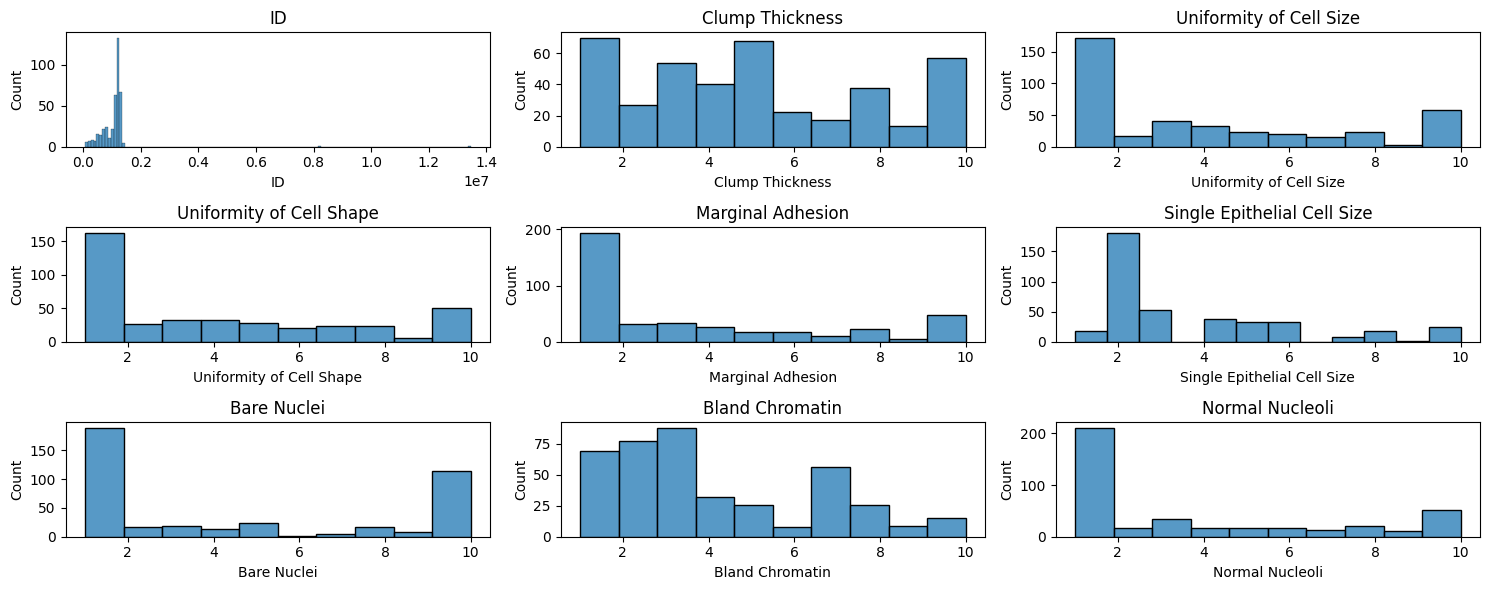

In [ ]:
# Crear la figura y los subgráficos
fig, ax = plt.subplots(3, 3, figsize=(15, 6))
ax = ax.flatten()  # Aplanar la matriz de ejes para indexarlos fácilmente

for i, col in enumerate(data_downsampled.columns):
    sns.histplot(data=data_downsampled[col], ax=ax[i])
    ax[i].set_title(col)
    if i == 8:
        break
# Ajustar el espaciado entre los subgráficos
plt.tight_layout()
plt.show()

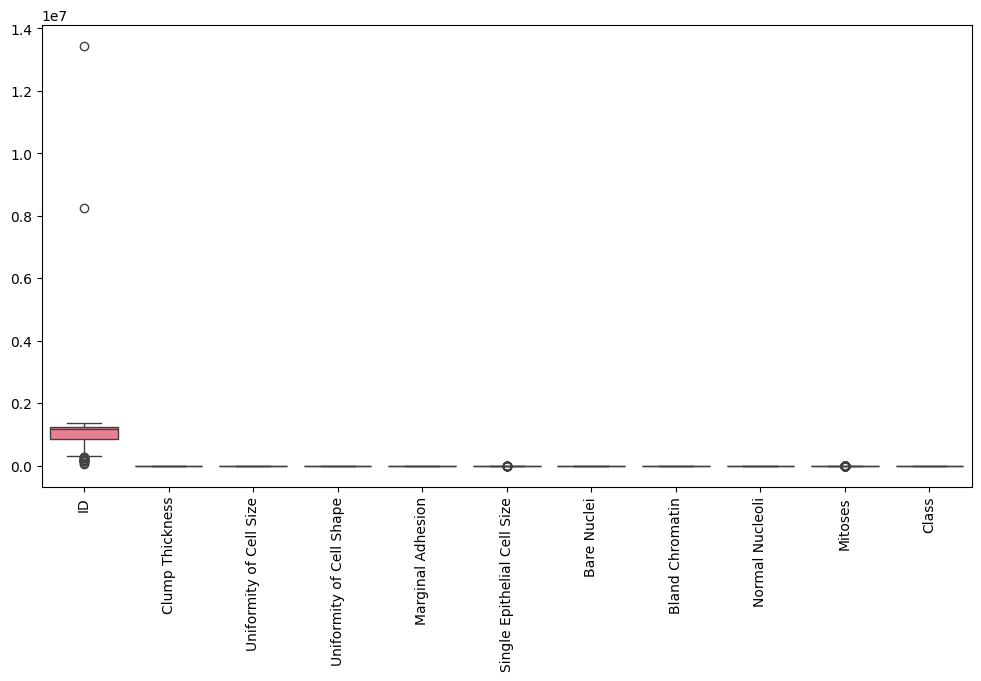

In [ ]:
#@title Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_downsampled)
plt.xticks(rotation=90)  # Rotar etiquetas si hay muchas columnas
plt.show()

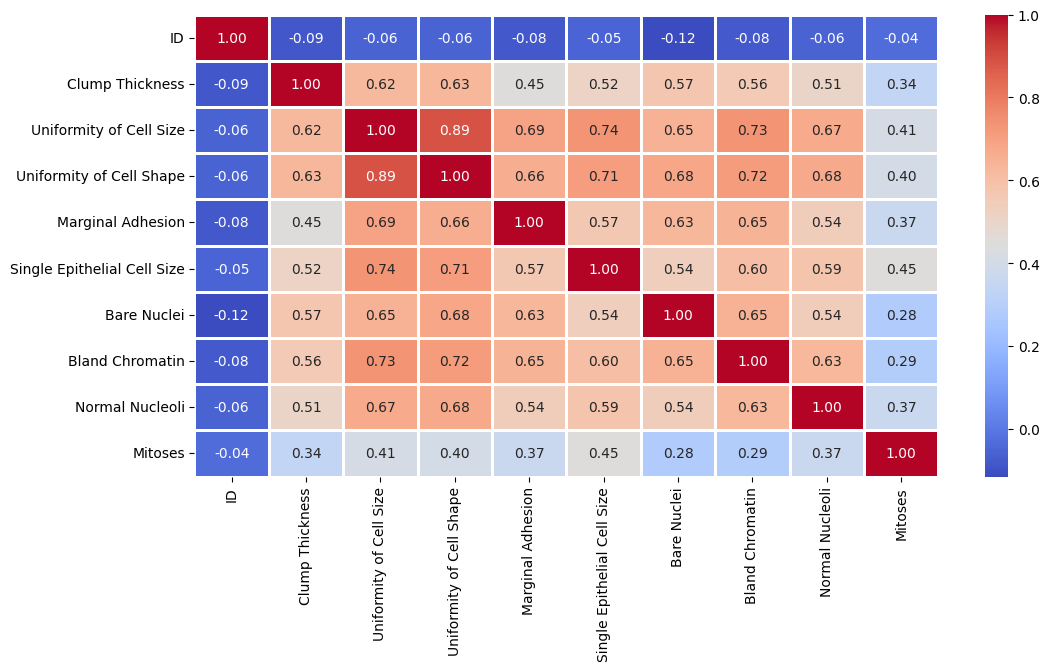

In [ ]:
#@title  heatmap
# Crear el mapa de calor de correlación
plt.figure(figsize=(12, 6))
sns.heatmap(data_downsampled.drop(columns=['Class']).corr(),
			cmap='coolwarm',
			fmt='.2f',
			linewidths=2,
			annot=True)
plt.show()

In [ ]:
correlation = data_downsampled.corr()
print(correlation["Class"].sort_values(ascending=False))

Class                          1.000000
Bare Nuclei                    0.797005
Uniformity of Cell Shape       0.793357
Uniformity of Cell Size        0.783352
Bland Chromatin                0.744404
Clump Thickness                0.719549
Marginal Adhesion              0.685042
Normal Nucleoli                0.677273
Single Epithelial Cell Size    0.661405
Mitoses                        0.356372
ID                            -0.106609
Name: Class, dtype: float64


In [ ]:
# Definir los cuartiles
Q1 = data_downsampled.quantile(0.25)
Q3 = data_downsampled.quantile(0.75)
IQR = Q3 - Q1

# Filtrar outliers
outliers = (data_downsampled < (Q1 - 1.5 * IQR)) | (data_downsampled > (Q3 + 1.5 * IQR))

# Mostrar las filas con al menos un outlier
df_outliers = data_downsampled[outliers.any(axis=1)]

In [ ]:
df_outliers.shape

(119, 11)

#Entrenamiento

In [ ]:
#@title Entrenamiento sin transformaciones
#split
X = data_downsampled.drop(columns=['Class'])
y = data_downsampled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#train
modelos = [LogisticRegression(), SVC(), RandomForestClassifier(), DecisionTreeClassifier(), XGBClassifier(), GaussianNB()]
resultados = []
for model in modelos:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  train_rog_auc = ras(y_train, model.predict(X_train))
  test_rog_auc = ras(y_test, y_pred)
  ac_sc = accuracy_score(y_test, y_pred)
  pr_sc = precision_score(y_test, y_pred)
  re_sc = recall_score(y_test, y_pred)
  f1_sc = f1_score(y_test, y_pred)
  dic = {"Modelo":model, "Train ROG-AUC Score":train_rog_auc,
         "Test ROG-AUC Score": test_rog_auc, "Accuracy": ac_sc,
         "Precision": pr_sc, "Recall": re_sc, "F1-Score": f1_sc}
  resultados.append(dic)
print (pd.DataFrame(resultados).sort_values(by='Test ROG-AUC Score', ascending=False))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                                              Modelo  Train ROG-AUC Score  \
2  (DecisionTreeClassifier(max_features='sqrt', r...             1.000000   
4  XGBClassifier(base_score=None, booster=None, c...             1.000000   
3                           DecisionTreeClassifier()             1.000000   
0                               LogisticRegression()             0.962454   
5                                       GaussianNB()             0.484203   
1                                              SVC()             0.534341   

   Test ROG-AUC Score  Accuracy  Precision    Recall  F1-Score  
2            0.939514  0.939024   0.916667  0.942857  0.929577  
4            0.939514  0.939024   0.916667  0.942857  0.929577  
3            0.925228  0.926829   0.914286  0.914286  0.914286  
0            0.910942  0.914634   0.911765  0.885714  0.898551  
5            0.492705  0.426829   0.423077  0.942857  0.584071  
1            0.447720  0.475610   0.346154  0.257143  0.295082  


In [ ]:
#Prueba diferentes algoritmos con diferentes parámetros hasta cumplir los requisitos.
# Lista de modelos a evaluar
models = [
    LogisticRegression(),
    XGBClassifier(),
    SVC(kernel='rbf', probability=True),
    RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7),
    DecisionTreeClassifier()
]

# Evaluación de modelos
for model in models:
    model.fit(X_train, y_train)
    print(f'\n{model} :')

    # Predicciones en el conjunto de entrenamiento y validación
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Calcular y mostrar métricas
    print(f'Accuracy Score: {accuracy_score(y_test, test_preds):.4f}')
    print(f'Precision Score: {precision_score(y_test, test_preds, average="macro"):.4f}')
    print(f'Recall Score: {recall_score(y_test, test_preds, average="macro"):.4f}')
    print(f'F1 Score: {f1_score(y_test, test_preds, average="macro"):.4f}')








LogisticRegression() :
Accuracy Score: 0.9146
Precision Score: 0.9142
Recall Score: 0.9109
F1 Score: 0.9124


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) :
Accuracy Score: 0.9390
Precision Score: 0.9366
Recall Score: 0.9395
F1 Score: 0.9379

SVC(probability=True) :
Accuracy Score: 0.4756
Precision Score: 0.4409
Recall Score: 0.4477
F1 Score: 0.4388

RandomForestClassifier(criterion='entropy',

In [ ]:
#@title hiperparametros con GrisSerachCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Separar características y variable objetivo
X = data_downsampled.drop(columns=['Class', 'Mitoses'])
y = data_downsampled['Class']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la cuadrícula de hiperparámetros
param_grid = {
    "n_estimators": [10, 50, 100, 200],  # Número de árboles
    "max_depth": [None, 5, 10, 20],  # Profundidad máxima
    "min_samples_split": [2, 5, 10],  # Muestras mínimas para dividir
    "min_samples_leaf": [1, 2, 5],  # Muestras mínimas en hoja
    "max_features": ["sqrt", "log2"],  # Características consideradas en cada split
    "bootstrap": [True, False]  # Si se usa muestreo con reemplazo
}

# Inicializar modelo base
rf_model = RandomForestClassifier(random_state=42, criterion="entropy")

# Configurar GridSearchCV
grid_search = GridSearchCV(
    rf_model, param_grid, cv=5, scoring="roc_auc", n_jobs=-1, verbose=1
)

# Ajustar GridSearchCV al dataset
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluar el modelo optimizado en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular métricas
test_roc_auc = roc_auc_score(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

# Guardar resultados en un DataFrame
results = {
    "Best Hyperparameters": best_params,
    "Test ROC-AUC Score": test_roc_auc,
    "Test Accuracy": test_accuracy,
    "Test Precision": test_precision,
    "Test Recall": test_recall,
    "Test F1-Score": test_f1
}

# Mostrar los mejores hiperparámetros y métricas finales
print(pd.DataFrame([results]))


Fitting 5 folds for each of 576 candidates, totalling 2880 fits
                                Best Hyperparameters  Test ROC-AUC Score  \
0  {'bootstrap': True, 'max_depth': 5, 'max_featu...            0.953799   

   Test Accuracy  Test Precision  Test Recall  Test F1-Score  
0        0.95122        0.918919     0.971429       0.944444  


In [ ]:
best_model

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       n_estimators=50, random_state=42)

#Otros modelos

##Transformación y estandarización
+ Si XGB o RF no funcionan bien, probar como funciona mediante las trasnformaciones logaritmcas  
+ Si usas modelos como KNN, SVM o redes neuronales, la normalización (MinMaxScaler) puede ser mejor.
+ Si usas modelos lineales o PCA, la estandarización (StandardScaler) es una mejor opción.

In [ ]:
#@title convertir mitosis en logaritmica y aplicar normalización MinMaxScaler
#log
data_downsampled['Mitoses'] = np.log1p(data_downsampled['Mitoses'])

#MinMax
scaler = MinMaxScaler()
data_downsampled_scaled = scaler.fit_transform(data_downsampled)
# Convertir de nuevo a DataFrame
data_downsampled_scaled = pd.DataFrame(data_downsampled_scaled, columns=data_downsampled.columns)

# entrenamiento con la logaritmica de mitosis y la normalización
X = data_downsampled_scaled.drop(columns=['Class'])
y = data_downsampled_scaled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelos = [LogisticRegression(), SVC(), RandomForestClassifier(), DecisionTreeClassifier(), XGBClassifier(), GaussianNB()]
resultados = []
for model in modelos:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  train_rog_auc = ras(y_train, model.predict(X_train))
  test_rog_auc = ras(y_test, y_pred)
  ac_sc = accuracy_score(y_test, y_pred)
  pr_sc = precision_score(y_test, y_pred)
  re_sc = recall_score(y_test, y_pred)
  f1_sc = f1_score(y_test, y_pred)
  dic = {"Modelo":model, "Train ROG-AUC Score":train_rog_auc,
         "Test ROG-AUC Score": test_rog_auc, "Accuracy": ac_sc,
         "Precision": pr_sc, "Recall": re_sc, "F1-Score": f1_sc}
  resultados.append(dic)
print (pd.DataFrame(resultados).sort_values(by='Test ROG-AUC Score', ascending=False))


                                              Modelo  Train ROG-AUC Score  \
0                               LogisticRegression()             0.984203   
1                                              SVC()             0.983974   
2  (DecisionTreeClassifier(max_features='sqrt', r...             1.000000   
3                           DecisionTreeClassifier()             1.000000   
4  XGBClassifier(base_score=None, booster=None, c...             1.000000   
5                                       GaussianNB()             0.980769   

   Test ROG-AUC Score  Accuracy  Precision    Recall  F1-Score  
0            0.950152  0.951220   0.942857  0.942857  0.942857  
1            0.939514  0.939024   0.916667  0.942857  0.929577  
2            0.939514  0.939024   0.916667  0.942857  0.929577  
3            0.939514  0.939024   0.916667  0.942857  0.929577  
4            0.939514  0.939024   0.916667  0.942857  0.929577  
5            0.928875  0.926829   0.891892  0.942857  0.916667  


Resultados ligeramente parecidos a los anteriores pero inferiores.
Se continuará trabajando con todas las columnas en el df, la transformación logarítmica en Mitoses

In [ ]:
#@title entrenamiento con la logaritmica de "Mitoses", "Normal Nucleoli", "Bare Nuclei" y la normalización
#Transformación logarítmica
columnas_a_logaritmir = ['Mitoses', 'Normal Nucleoli', 'Bare Nuclei']
for col in columnas_a_logaritmir:
    data_downsampled[col] = np.log1p(data_downsampled[col])

#normalización min max
scaler = MinMaxScaler()
data_downsampled_scaled = scaler.fit_transform(data_downsampled)
data_downsampled_scaled = pd.DataFrame(data_downsampled_scaled, columns=data_downsampled.columns)


#entrenamiento
X = data_downsampled_scaled.drop(columns=['Class'])
y = data_downsampled_scaled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelos = [LogisticRegression(), SVC(), RandomForestClassifier(), DecisionTreeClassifier(), XGBClassifier()]
resultados = []
for model in modelos:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  train_rog_auc = ras(y_train, model.predict(X_train))
  test_rog_auc = ras(y_test, y_pred)
  ac_sc = accuracy_score(y_test, y_pred)
  pr_sc = precision_score(y_test, y_pred)
  re_sc = recall_score(y_test, y_pred)
  f1_sc = f1_score(y_test, y_pred)
  dic = {"Modelo":model, "Train ROG-AUC Score":train_rog_auc,
         "Test ROG-AUC Score": test_rog_auc, "Accuracy": ac_sc,
         "Precision": pr_sc, "Recall": re_sc, "F1-Score": f1_sc}
  resultados.append(dic)
print (pd.DataFrame(resultados).sort_values(by='Test ROG-AUC Score', ascending=False))


                                              Modelo  Train ROG-AUC Score  \
0                               LogisticRegression()             0.987179   
1                                              SVC()             0.983974   
2  (DecisionTreeClassifier(max_features='sqrt', r...             1.000000   
3                           DecisionTreeClassifier()             1.000000   
4  XGBClassifier(base_score=None, booster=None, c...             1.000000   

   Test ROG-AUC Score  Accuracy  Precision    Recall  F1-Score  
0            0.950152  0.951220   0.942857  0.942857  0.942857  
1            0.939514  0.939024   0.916667  0.942857  0.929577  
2            0.939514  0.939024   0.916667  0.942857  0.929577  
3            0.939514  0.939024   0.916667  0.942857  0.929577  
4            0.939514  0.939024   0.916667  0.942857  0.929577  


Aunque se mantienen los valores de ROG-AUC (desciende ligermanete) y accuracy (mismo valor), la **precisión aumenta (detección de falsos positivos**) pero **desciende considerablemente Recall (detección de verdaderos positivos)**. Además, desciende ligeramente el balance de precisión y recall (F1-score).

Por todo ello, descartamos este tipo de transformaciones y continuaremos con el dataset sin transformar.

In [ ]:
#@title entrenamiento eliminando la columna de mitosis
X = data_downsampled.drop(columns=['Class','Mitoses'])
y = data_downsampled['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelos = [LogisticRegression(), SVC(), RandomForestClassifier(), DecisionTreeClassifier(), XGBClassifier()]
resultados = []
for model in modelos:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  train_rog_auc = ras(y_train, model.predict(X_train))
  test_rog_auc = ras(y_test, y_pred)
  ac_sc = accuracy_score(y_test, y_pred)
  pr_sc = precision_score(y_test, y_pred)
  re_sc = recall_score(y_test, y_pred)
  f1_sc = f1_score(y_test, y_pred)
  dic = {"Modelo":model, "Train ROG-AUC Score":train_rog_auc,
         "Test ROG-AUC Score": test_rog_auc, "Accuracy": ac_sc,
         "Precision": pr_sc, "Recall": re_sc, "F1-Score": f1_sc}
  resultados.append(dic)
print (pd.DataFrame(resultados).sort_values(by='Test ROG-AUC Score', ascending=False))

                                              Modelo  Train ROG-AUC Score  \
2  (DecisionTreeClassifier(max_features='sqrt', r...             1.000000   
0                               LogisticRegression()             0.981227   
1                                              SVC()             0.978251   
3                           DecisionTreeClassifier()             1.000000   
4  XGBClassifier(base_score=None, booster=None, c...             1.000000   

   Test ROG-AUC Score  Accuracy  Precision    Recall  F1-Score  
2            0.953799  0.951220   0.918919  0.971429  0.944444  
0            0.939514  0.939024   0.916667  0.942857  0.929577  
1            0.939514  0.939024   0.916667  0.942857  0.929577  
3            0.939514  0.939024   0.916667  0.942857  0.929577  
4            0.939514  0.939024   0.916667  0.942857  0.929577  


In [ ]:
#@title Aplicando  Cross-validation

# Separar características y variable objetivo
X = data_downsampled.drop(columns=['Class', ])
y = data_downsampled['Class']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo
model = DecisionTreeClassifier()

# Aplicar validación cruzada con 5 folds
cv_auc = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
cv_precision = cross_val_score(model, X_train, y_train, cv=5, scoring='precision')
cv_recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
cv_f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

# Entrenar el modelo en los datos de entrenamiento
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluaciones en el conjunto de prueba
test_roc_auc = ras(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

# Crear diccionario con los resultados
dic = {
    "Modelo": model,
    "Train ROC-AUC CV Score (mean)": cv_auc.mean(),
    "Test ROC-AUC Score": test_roc_auc,
    "Train Accuracy CV Score (mean)": cv_accuracy.mean(),
    "Test Accuracy": test_accuracy,
    "Train Precision CV Score (mean)": cv_precision.mean(),
    "Test Precision": test_precision,
    "Train Recall CV Score (mean)": cv_recall.mean(),
    "Test Recall": test_recall,
    "Train F1 CV Score (mean)": cv_f1.mean(),
    "Test F1-Score": test_f1
}

# Mostrar resultados en un DataFrame
pd.DataFrame([dic])

,Modelo,Train ROC-AUC CV Score (mean),Test ROC-AUC Score,Train Accuracy CV Score (mean),Test Accuracy,Train Precision CV Score (mean),Test Precision,Train Recall CV Score (mean),Test Recall,Train F1 CV Score (mean),Test F1-Score
0,DecisionTreeClassifier(),0.944348,0.939514,0.947548,0.939024,0.952698,0.916667,0.946168,0.942857,0.949028,0.929577


In [ ]:
#@title aplicando grid_seach CV para el ajuste hiperparametros
# Separar características y variable objetivo
X = data_downsampled.drop(columns=['Class', 'Mitoses'])
y = data_downsampled['Class']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los hiperparámetros que queremos probar
param_grid = {
    "max_depth": [3, 5, 10, None],  # Profundidad máxima del árbol
    "min_samples_split": [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    "min_samples_leaf": [1, 2, 5],  # Número mínimo de muestras en cada hoja
    "criterion": ["gini", "entropy"],  # Función de división
    "max_features": [None, "sqrt", "log2"]  # Número de características a considerar
}

# Crear el modelo base
model = DecisionTreeClassifier(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(
    model, param_grid, cv=5, scoring="roc_auc", n_jobs=-1, verbose=1
)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluar el modelo optimizado en los datos de prueba
y_pred = best_model.predict(X_test)

# Calcular métricas
test_roc_auc = ras(y_test, y_pred)
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

# Guardar resultados
results = {
    "Best Hyperparameters": best_params,
    "Test ROC-AUC Score": test_roc_auc,
    "Test Accuracy": test_accuracy,
    "Test Precision": test_precision,
    "Test Recall": test_recall,
    "Test F1-Score": test_f1
}

# Mostrar los mejores hiperparámetros y métricas finales
print(pd.DataFrame([results]))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
                                Best Hyperparameters  Test ROC-AUC Score  \
0  {'criterion': 'gini', 'max_depth': 5, 'max_fea...            0.939514   

   Test Accuracy  Test Precision  Test Recall  Test F1-Score  
0       0.939024        0.916667     0.942857       0.929577  
